In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
company_list=['AAPL_data.csv','GOOGL_data.csv','AMZN_data.csv','FB_data.csv','NFLX_data.csv']

In [3]:
path='E:\DA_TestCases\individual_stocks_5yr-20220125T192853Z-001\data'
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+ '/' +file)
    all_data=pd.concat([all_data,current_df])


In [4]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [5]:
all_data.Name.unique()

array(['AAPL', 'GOOGL', 'AMZN', 'FB', 'NFLX'], dtype=object)

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6295 non-null   object 
 1   open    6295 non-null   float64
 2   high    6295 non-null   float64
 3   low     6295 non-null   float64
 4   close   6295 non-null   float64
 5   volume  6295 non-null   int64  
 6   Name    6295 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 393.4+ KB


#### Here the datatype of Date is string we need to convert it into DateTime first

In [7]:
all_data['date']=pd.to_datetime(all_data['date'])

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6295 non-null   datetime64[ns]
 1   open    6295 non-null   float64       
 2   high    6295 non-null   float64       
 3   low     6295 non-null   float64       
 4   close   6295 non-null   float64       
 5   volume  6295 non-null   int64         
 6   Name    6295 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 393.4+ KB


In [9]:
stock_list=all_data.Name.unique()

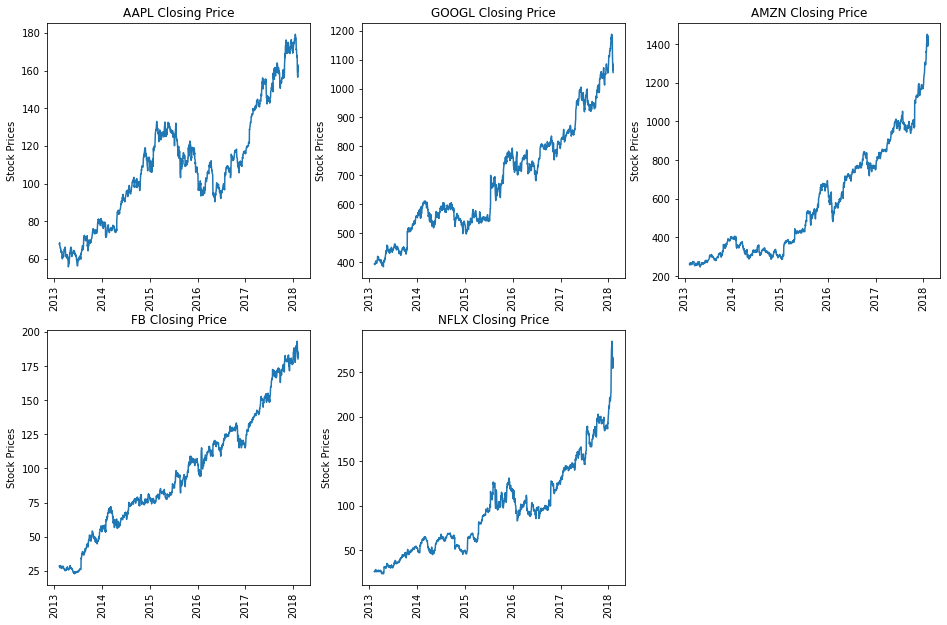

In [10]:
plt.figure(figsize=(16,16))
for i,company  in enumerate(stock_list,1):
    plt.subplot(3,3,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company + ' Closing Price')
    plt.ylabel('Stock Prices')
    
    plt.xticks(rotation='vertical')
    plt.tight_layout

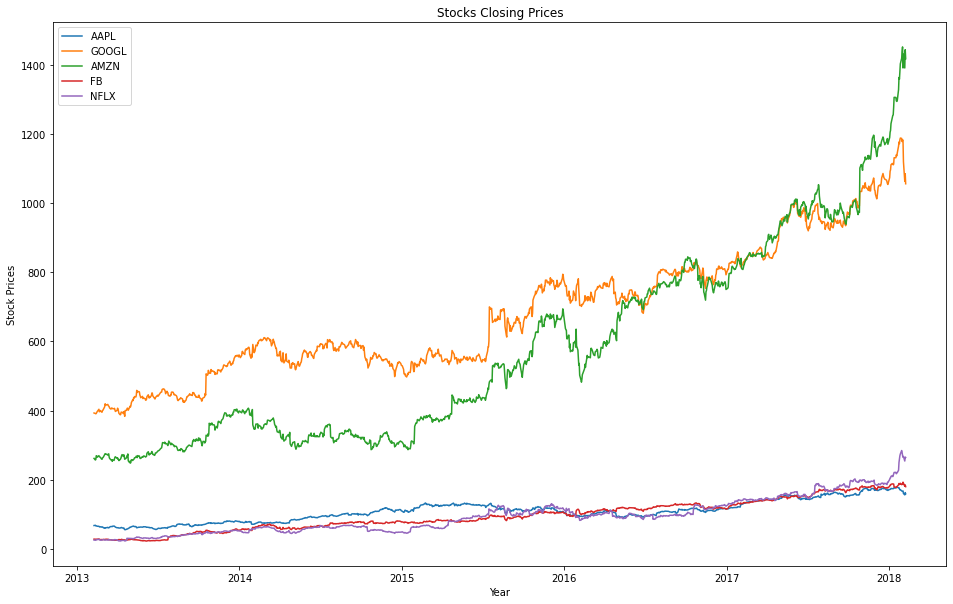

In [11]:
plt.figure(figsize=(16,10))


for i,company  in enumerate(stock_list,1):
#     plt.subplot(3,3,i)
    df=all_data[all_data['Name']==company]
    c=df.Name.unique()[0]
    plt.plot(df['date'],df['close'],label=c)
    plt.title('Stocks Closing Prices')
    plt.ylabel('Stock Prices')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  

In [12]:
import plotly.express as px

In [13]:
for company in stock_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

In [14]:
all_data.head()

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [15]:
all_data['Daily_change in price']=all_data['close']-all_data['open']

In [16]:
all_data.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily_change in price  
0                 0.1400  
1                 0.4900  
2                -1.6586  
3                -0.0286  
4                 0.2957

In [17]:
all_data['Daily % return']=(all_data['Daily_change in price']/all_data['close'])*100

In [18]:
all_data.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily_change in price  Daily % return  
0                 0.1400        0.206325  
1                 0.4900        0.714688  
2                -1.6586       -2.481344  
3                -0.0286       -0.042869  
4                 0.2957        0.443624

In [19]:
for company in stock_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='Daily % return',title=company)
    fig.show()

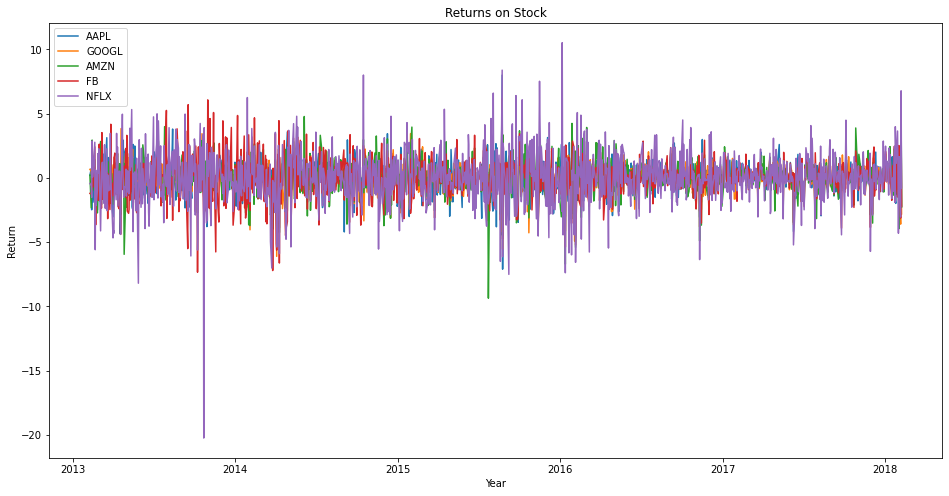

In [20]:
plt.figure(figsize=(16,8))


for i,company  in enumerate(stock_list,1):
#     plt.subplot(3,3,i)
    df=all_data[all_data['Name']==company]
    c=df.Name.unique()[0]
    plt.plot(df['date'],df['Daily % return'],label=c)
    plt.title('Returns on Stock')
    plt.ylabel('Return')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  

#### From the above plot it can be seen that Netflix is more volatile stock in this period with maximum and minimum return.

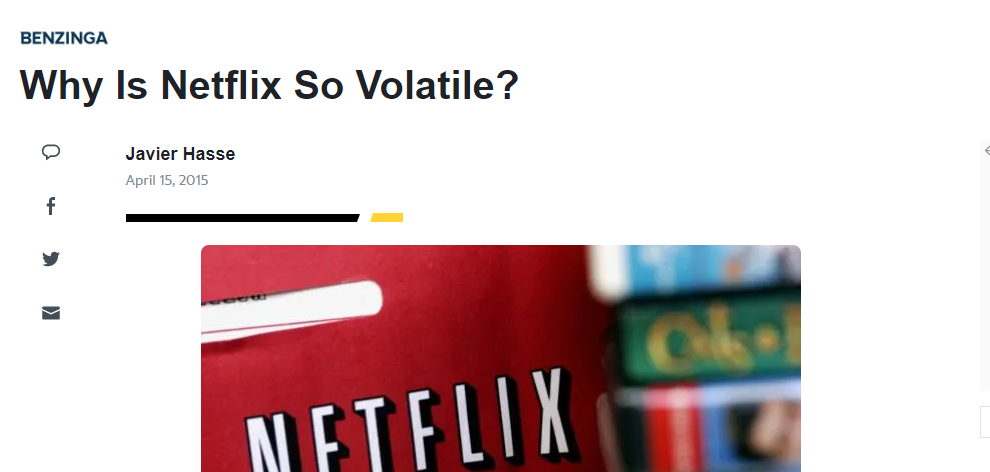

#### https://finance.yahoo.com/news/why-netflix-volatile-183628599.html

In [21]:
all_data_2=all_data

In [22]:
all_data_2.set_index('date',inplace=True)

In [23]:
all_data_2.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily_change in price  Daily % return  
date                                               
2013-02-08                 0.1400        0.206325  
2013-02-11                 0.4900        0.714688  
2013-02-12                -1.6586       -2.481344  
2013-02-13                -0.0286       -0.042869  
2013-02-14                 0.2957        0.443624

#### Resample--Convenience method for frequency conversion and resampling of time series

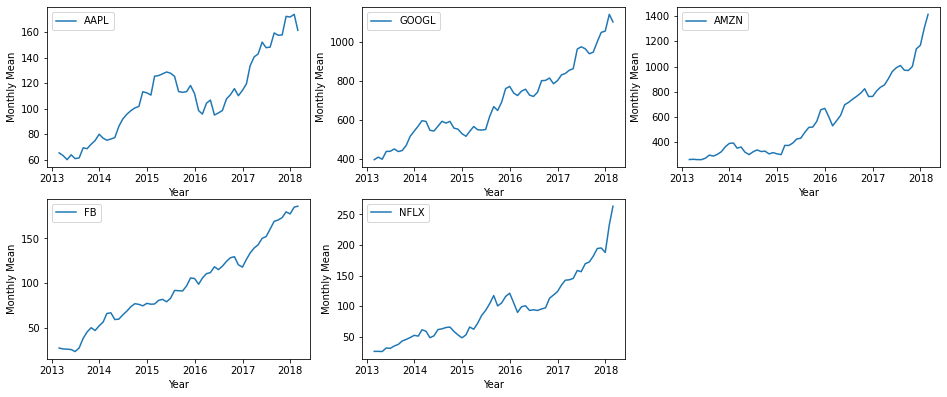

In [24]:
plt.figure(figsize=(16,10))
for i,company  in enumerate(stock_list,1):
    plt.subplot(3,3,i)
    df2=all_data_2[all_data_2['Name']==company]
    c=df2.Name.unique()[0]
    plt.plot(df2['close'].resample('M').mean(),label=c)
    plt.ylabel('Monthly Mean')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  


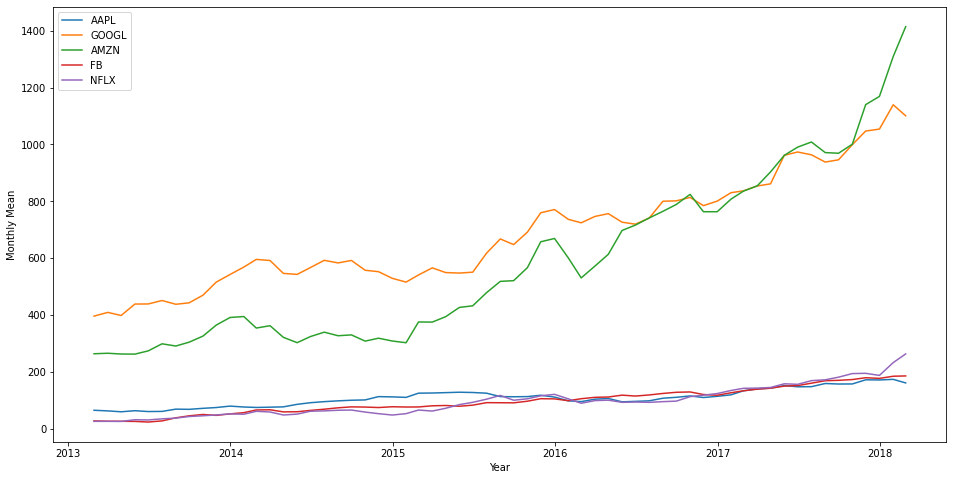

In [25]:
plt.figure(figsize=(16,8))
for i,company  in enumerate(stock_list,1):
    df2=all_data_2[all_data_2['Name']==company]
    c=df2.Name.unique()[0]
    plt.plot(df2['close'].resample('M').mean(),label=c)
    plt.ylabel('Monthly Mean')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  


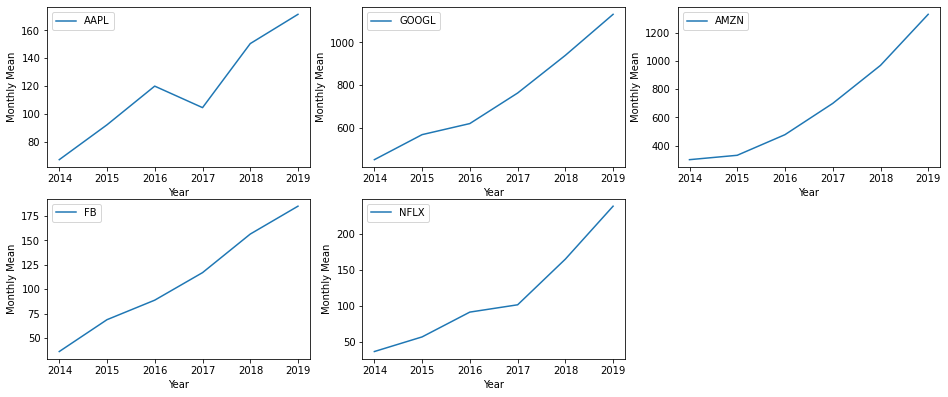

In [26]:
plt.figure(figsize=(16,10))
for i,company  in enumerate(stock_list,1):
    plt.subplot(3,3,i)
    df2=all_data_2[all_data_2['Name']==company]
    c=df2.Name.unique()[0]
#     df2['close'].resample('Y').mean().plot(kind='bar',label=c)
    plt.plot(df2['close'].resample('Y').mean(),label=c)
    plt.ylabel('Monthly Mean')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
#     plt.xticks(rotation='vertical')
  


In [27]:
meta=pd.read_csv('FB_data.csv')
apple=pd.read_csv('AAPL_data.csv')
amazon=pd.read_csv('AMZN_data.csv')
netflix=pd.read_csv('NFLX_data.csv')
google=pd.read_csv('GOOGL_data.csv')

In [28]:
google.head()

date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [29]:
cor_df=pd.concat([meta['open'],apple['open'],amazon['open'],netflix['open'],google['open']],axis=1)
cor_df.columns=['Meta Open','Apple Open','Amazon Open','Netflix Open','Google Open']

In [30]:
cor_df.head()

Meta Open  Apple Open  Amazon Open  Netflix Open  Google Open
0      28.89     67.7142       261.40       25.9635     390.4551
1      28.61     68.0714       263.20       25.5685     389.5892
2      27.67     68.5014       259.19       25.8085     391.2659
3      27.36     66.7442       261.53       25.8428     390.4551
4      28.02     66.3599       267.37       26.7557     390.2549

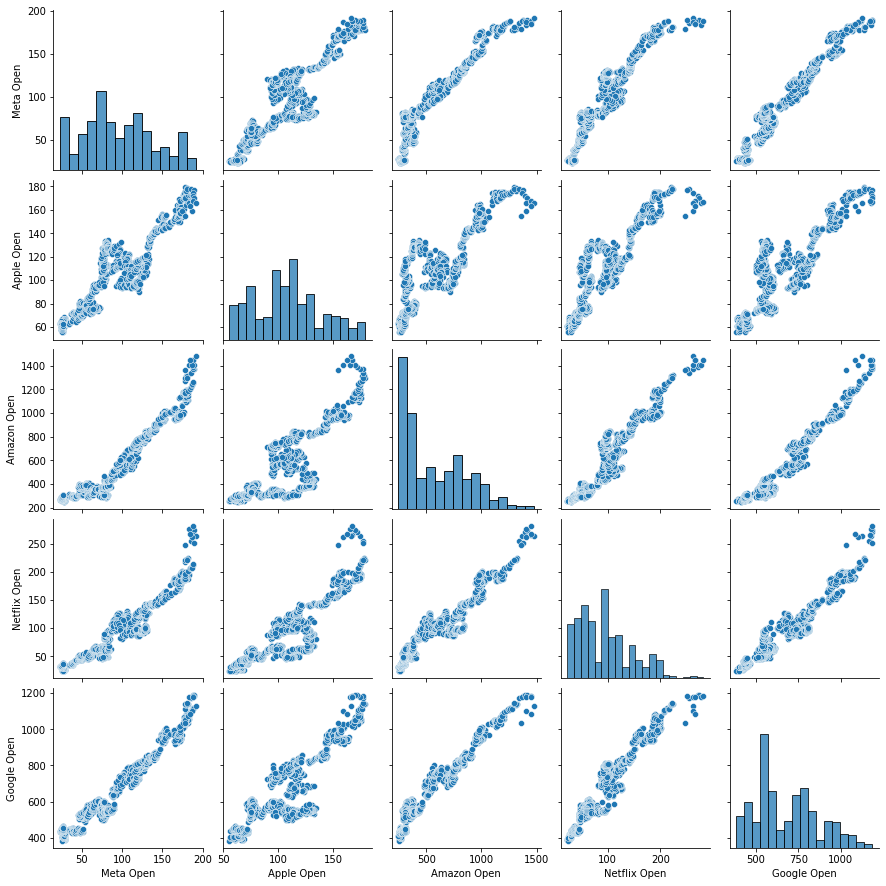

In [31]:
sns.pairplot(cor_df,palette='Blues')

<AxesSubplot:>

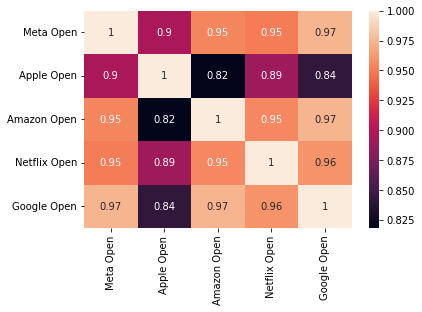

In [32]:
sns.heatmap(cor_df.corr(),annot=True)

In [33]:
change_df=pd.DataFrame()

In [34]:
change_df['meta_change']=((meta['close']-meta['open'])/meta['close'])*100
change_df['apple_change']=((apple['close']-apple['open'])/apple['close'])*100
change_df['amazon_change']=((amazon['close']-amazon['open'])/amazon['close'])*100
change_df['netflix_change']=((netflix['close']-netflix['open'])/netflix['close'])*100
change_df['google_change']=((google['close']-google['open'])/google['close'])*100

In [35]:
change_df.head()

meta_change  apple_change  amazon_change  netflix_change  google_change
0    -1.208618      0.206325       0.209964       -0.428193       0.667196
1    -1.238500      0.714688      -2.328836       -0.612683       0.513788
2    -1.096091     -2.481344      -0.189409       -1.522733      -0.134514
3     1.961838     -0.042869       2.946525        2.882397       0.348705
4     1.684211      0.443624       0.694548        0.058645       1.026873

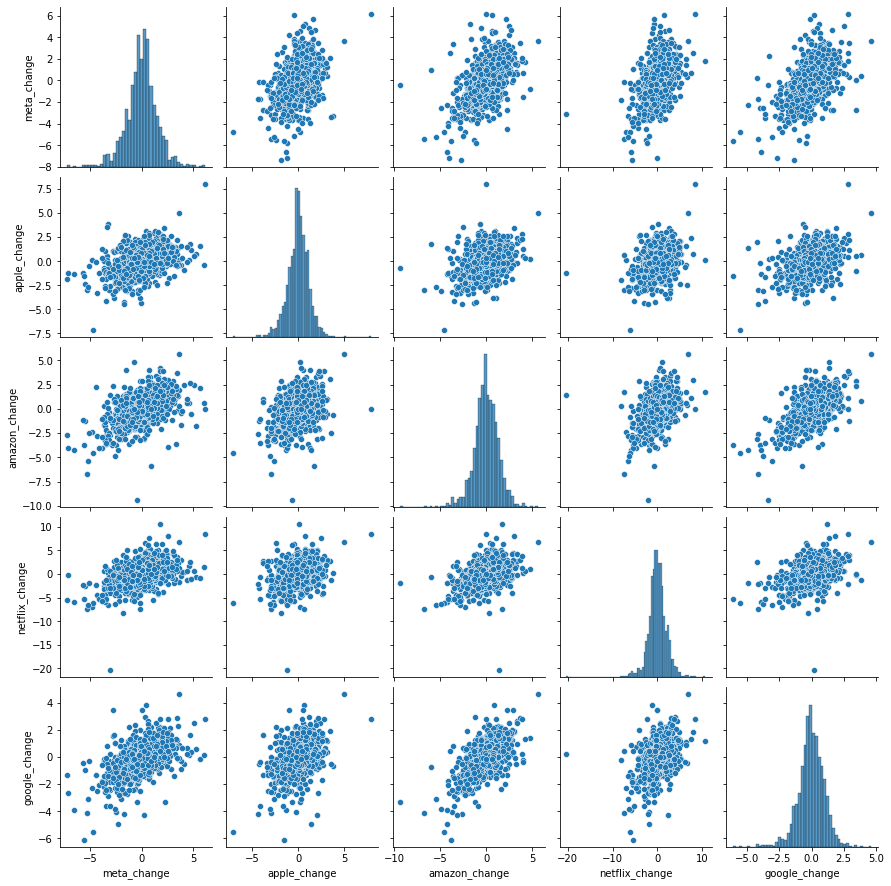

In [36]:
sns.pairplot(change_df,palette='Blues')

<AxesSubplot:>

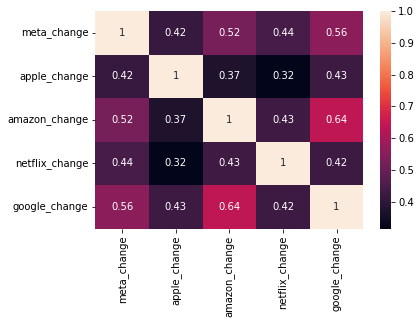

In [37]:
sns.heatmap(change_df.corr(),annot=True)

#### amazon and google are highly corelated 64%, netflix and apple are least corelated in daily percenatge change 32%

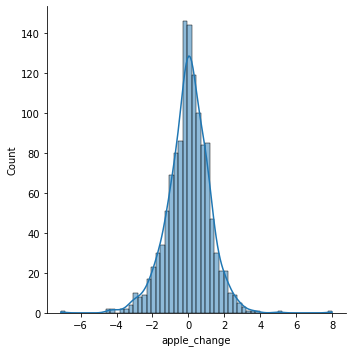

In [38]:
sns.displot(change_df['apple_change'],kde=True)


#### Its is normally distributed

In [39]:
change_df['apple_change'].std()*3  
# 99.7 of entire data will be in the 3rd standard deviation.

3.561413139426371

In [40]:
change_df['apple_change'].quantile(0.1)

-1.4246644227944307

#### In apple,90% of time the maximum loss will not cross more than 1.42%

In [41]:
change_df.describe().T

count      mean       std        min       25%       50%  \
meta_change     1259.0 -0.005020  1.544814  -7.339839 -0.801400  0.037608   
apple_change    1259.0 -0.000215  1.187138  -7.104299 -0.658021  0.042230   
amazon_change   1259.0 -0.000398  1.358679  -9.363077 -0.738341 -0.002623   
netflix_change  1259.0  0.010494  2.074742 -20.251634 -1.080091 -0.025157   
google_change   1259.0 -0.028349  1.052191  -6.107290 -0.575799 -0.004508   

                     75%        max  
meta_change     0.819780   6.163966  
apple_change    0.715427   8.000388  
amazon_change   0.852568   5.640265  
netflix_change  1.092989  10.528552  
google_change   0.624730   4.652214

### Moving Avg

<AxesSubplot:>

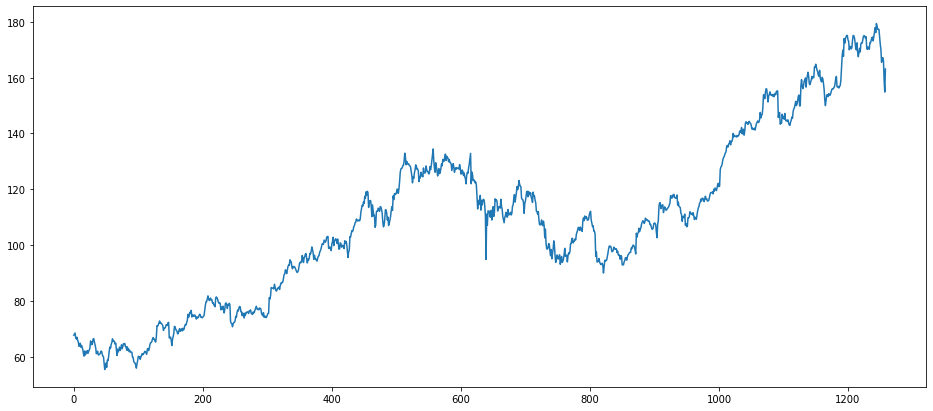

In [42]:
apple['open'].plot(label='Apple Open',figsize=(16,7))

#### Here the data looks noisy,so data might not be reliable given short observation window.SO here Moving Avg comes into picture.Its a smoothing method in time series,its a way to make your data more reliable and robust against noise

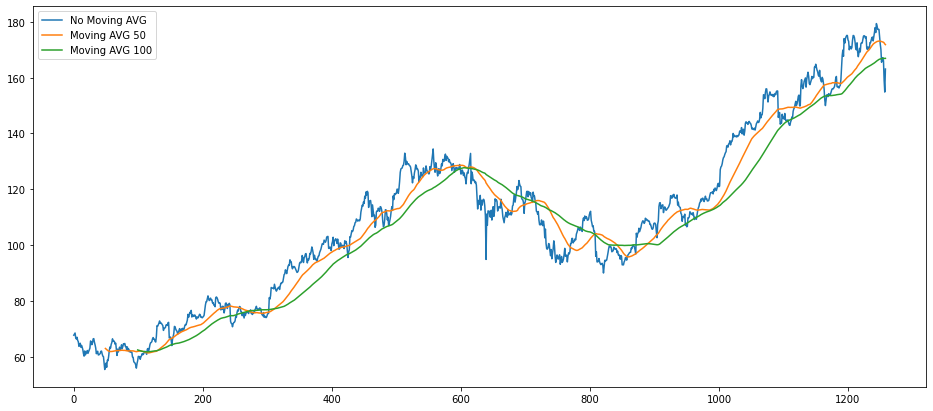

In [43]:
apple['open'].plot(label='No Moving AVG',figsize=(16,7))
apple['MAvg50']=apple['open'].rolling(50).mean()
apple['MAvg50'].plot(label='Moving AVG 50')
apple['MAvg100']=apple['open'].rolling(100).mean()
apple['MAvg100'].plot(label='Moving AVG 100')
plt.legend(loc='upper left')

#### When moving avg window size is high,you might miss out some trends

<function matplotlib.pyplot.show(close=None, block=None)>

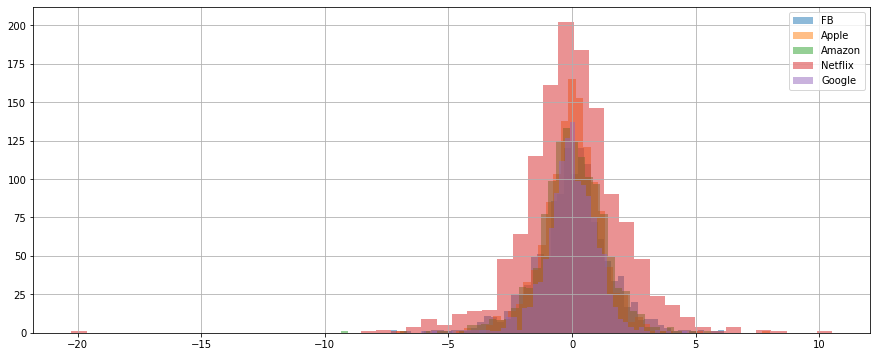

In [44]:
plt.figure(figsize=(15,6))
change_df['meta_change'].hist(bins=50,label='FB',alpha=0.5)
change_df['apple_change'].hist(bins=50,label='Apple',alpha=0.5)
change_df['amazon_change'].hist(bins=50,label='Amazon',alpha=0.5)
change_df['netflix_change'].hist(bins=50,label='Netflix',alpha=0.5)
change_df['google_change'].hist(bins=50,label='Google',alpha=0.5)

plt.tight_layout
plt.legend()
plt.show

### Volume Traded

In [45]:
# plt.figure(figsize=(16,7))
# meta['volume'].plot(label='Meta Volume traded')
# amazon['volume'].plot(label='Amazon Volume traded')
# apple['volume'].plot(label='Apple Volume traded')
# netflix['volume'].plot(label='Netflix Volume traded')
# google['volume'].plot(label='Google Volume traded')
# plt.title('Stock Volumes')
# plt.ylabel('Volume Traded')
# plt.xlabel('Year')
# plt.tight_layout
# plt.legend(loc='upper left')

In [46]:
meta.iloc[meta['volume'].argmax()]

date      2013-07-25
open          33.545
high           34.88
low            32.75
close         34.359
volume     365380568
Name              FB
Name: 115, dtype: object

### Meta

#### Here we can see that over the year the maximum volume of Facebook stock happend on 25th July 2013.And on 24th July Facebook 2nd Quarter results came you can have a look below.Also an article published by CNN Business on 25th July just after opening of the market made a clear that the shares will shoar.

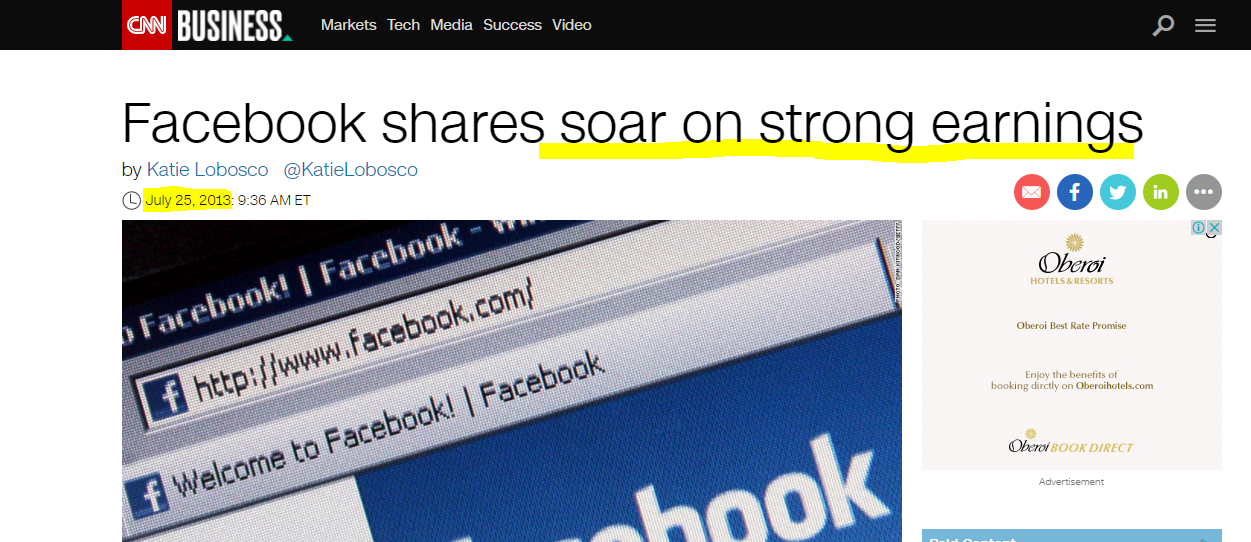

#### https://money.cnn.com/2013/07/24/technology/facebook-earnings/index.html

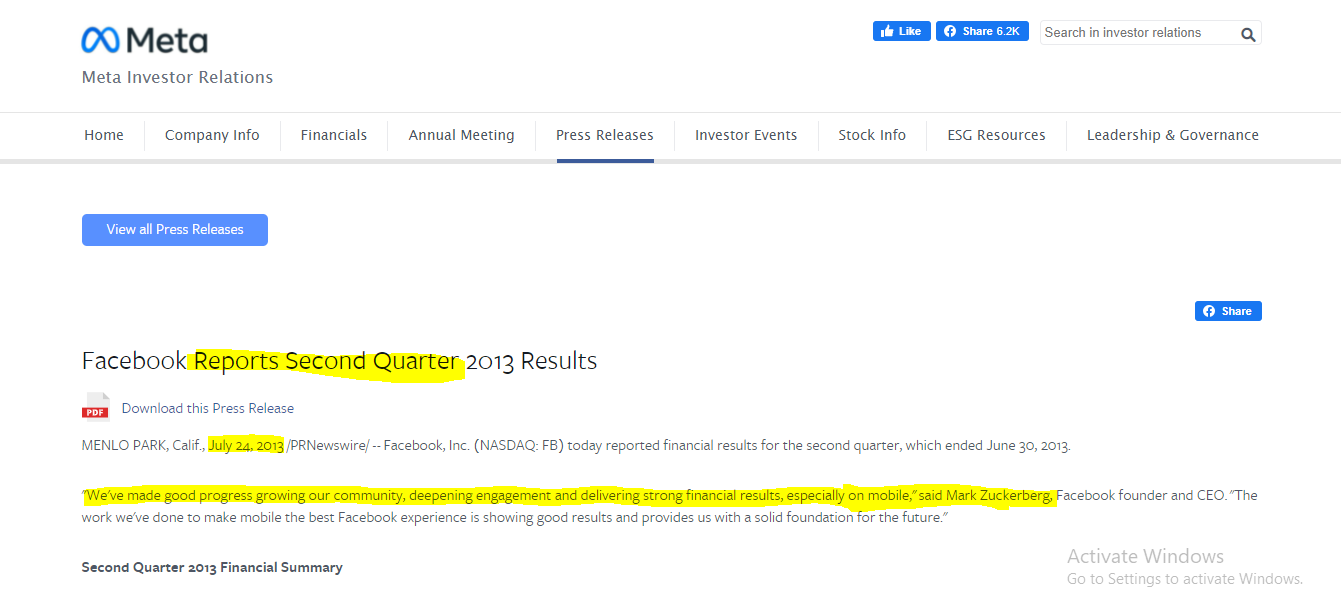

#### https://investor.fb.com/investor-news/press-release-details/2013/Facebook-Reports-Second-Quarter-2013-Results/default.aspx

### Apple

In [47]:
apple.iloc[apple['volume'].argmax()]

date       2014-01-28
open          72.6799
high          73.5714
low           71.7242
close         72.3571
volume      266833581
Name             AAPL
MAvg50      78.150656
MAvg100     74.706526
Name: 243, dtype: object

In [48]:
apple.loc[apple['date']=='2014-01-27']


date     open     high      low    close     volume  Name  \
242  2014-01-27  78.5813  79.2571  77.9642  78.6428  144219152  AAPL   

        MAvg50    MAvg100  
242  78.177056  74.693383

In [49]:
apple.loc[apple['date']=='2014-01-28']

date     open     high      low    close     volume  Name  \
243  2014-01-28  72.6799  73.5714  71.7242  72.3571  266833581  AAPL   

        MAvg50    MAvg100  
243  78.150656  74.706526

#### from the above,we can see that on 27th Jan 2014 the closing price of stock was 78.6 and on 28th Jan it opens at 72.67, the stock gets down by approx 8%.But still this day Apple received a record Volume traded.Here's are the article which makes this clear.

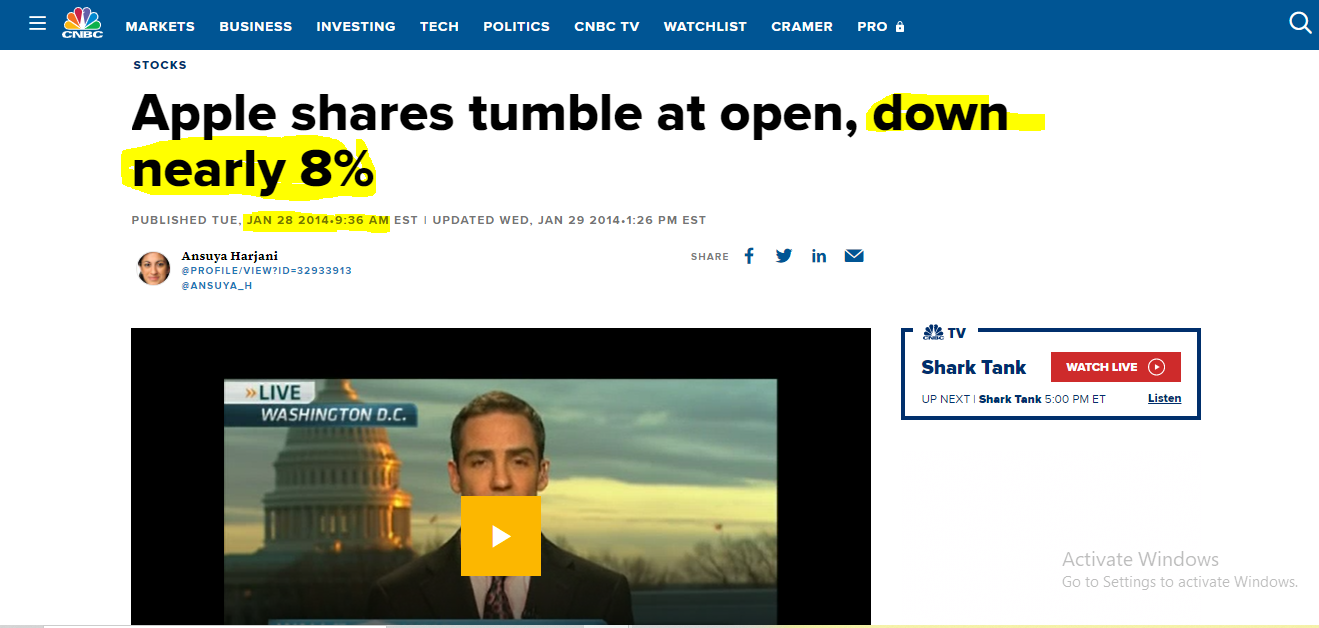

#### https://www.cnbc.com/2014/01/28/this-is-how-bad-it-could-get-for-apple-stock.html

In [50]:
amazon.iloc[amazon['volume'].argmax()]

date      2015-01-30
open          346.32
high           359.5
low           340.74
close         354.53
volume      23856060
Name            AMZN
Name: 497, dtype: object

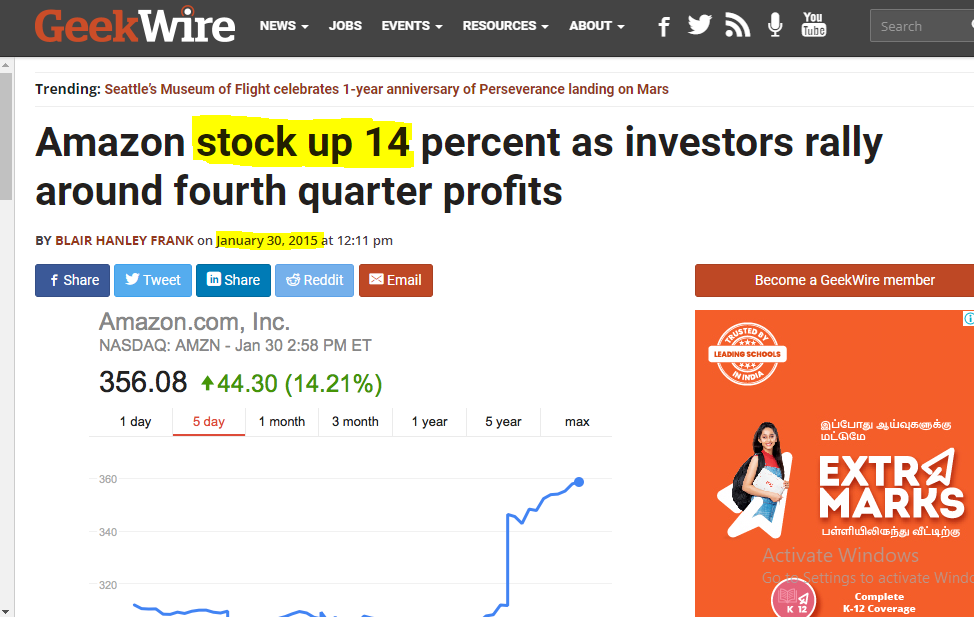

#### https://www.geekwire.com/2015/amazon-stock-14-percent-investors-rally-around-fourth-quarter-profits/

### Cumulative Return

In [55]:
google.head()

date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [63]:
# meta['meta_change']=((meta['close']-meta['open'])/meta['close'])*100
# apple['apple_change']=((apple['close']-apple['open'])/apple['close'])*100
# amazon['amazon_change']=((amazon['close']-amazon['open'])/amazon['close'])*100
# netflix['netflix_change']=((netflix['close']-netflix['open'])/netflix['close'])*100
# google['google_change']=((google['close']-google['open'])/google['close'])*100

In [61]:
meta['return']=(meta['close']/meta['close'].shift(1))-1

In [62]:
meta.head()

date   open   high    low    close    volume Name    return
0  2013-02-08  28.89  29.17  28.51  28.5450  37662614   FB       NaN
1  2013-02-11  28.61  28.68  28.04  28.2600  36979533   FB -0.009984
2  2013-02-12  27.67  28.16  27.10  27.3700  93417215   FB -0.031493
3  2013-02-13  27.36  28.32  27.31  27.9075  50100805   FB  0.019638
4  2013-02-14  28.02  28.63  28.01  28.5000  35581045   FB  0.021231

In [64]:
amazon['return']=(amazon['close']/amazon['close'].shift(1))-1
apple['return']=(apple['close']/apple['close'].shift(1))-1
netflix['return']=(netflix['close']/netflix['close'].shift(1))-1
google['return']=(google['close']/google['close'].shift(1))-1

In [65]:
amazon.head()

date    open    high      low   close   volume  Name    return
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN       NaN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN -0.018095
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN  0.005793
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN  0.041631
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN -0.000854

### numpy.cumprod() function is used when we want to compute the cumulative product of array elements over a given axis.

In [66]:
meta['cr']=meta['cr']=(1+meta['return']).cumprod()

In [67]:
meta.head()

date   open   high    low    close    volume Name    return        cr
0  2013-02-08  28.89  29.17  28.51  28.5450  37662614   FB       NaN       NaN
1  2013-02-11  28.61  28.68  28.04  28.2600  36979533   FB -0.009984  0.990016
2  2013-02-12  27.67  28.16  27.10  27.3700  93417215   FB -0.031493  0.958837
3  2013-02-13  27.36  28.32  27.31  27.9075  50100805   FB  0.019638  0.977667
4  2013-02-14  28.02  28.63  28.01  28.5000  35581045   FB  0.021231  0.998424

In [71]:
amazon['cr']=amazon['cr']=(1+amazon['return']).cumprod()
apple['cr']=apple['cr']=(1+apple['return']).cumprod()
netflix['cr']=netflix['cr']=(1+netflix['return']).cumprod()
google['cr']=google['cr']=(1+google['return']).cumprod()


In [93]:
netflix.head()

date     open     high      low    close    volume  Name    return  \
0  2013-02-08  25.9635  26.2800  25.7157  25.8528  25649820  NFLX       NaN   
1  2013-02-11  25.5685  26.0071  24.9714  25.4128  29321782  NFLX -0.017019   
2  2013-02-12  25.8085  26.2228  25.1014  25.4214  34388802  NFLX  0.000338   
3  2013-02-13  25.8428  26.6285  25.6657  26.6098  40799094  NFLX  0.046748   
4  2013-02-14  26.7557  27.1214  26.3844  26.7714  31968685  NFLX  0.006073   

         cr  
0       NaN  
1  0.982981  
2  0.983313  
3  1.029281  
4  1.035532

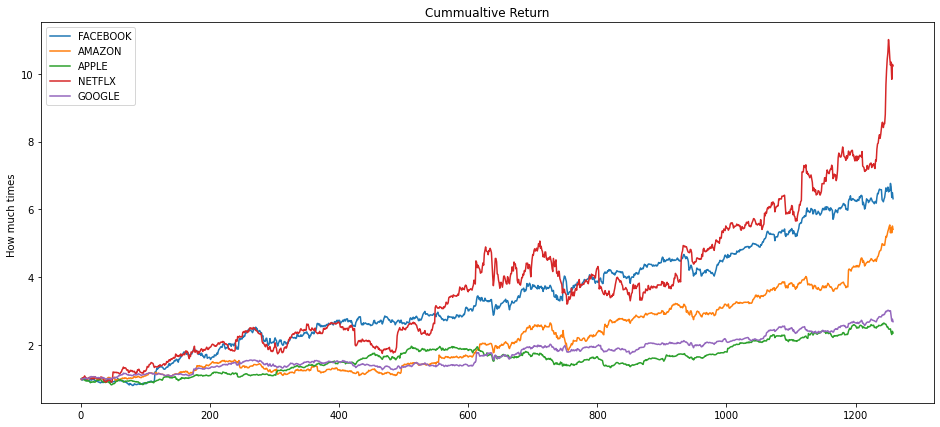

In [91]:
plt.figure(figsize=(16,7))
meta['cr'].plot(label='FACEBOOK')
amazon['cr'].plot(label='AMAZON')
apple['cr'].plot(label='APPLE')
netflix['cr'].plot(label='NETFLX')
google['cr'].plot(label='GOOGLE')
plt.title('Cummualtive Return')
# plt.xlabel('DATE')
plt.ylabel('How much times ')
plt.legend(loc='upper left')

#### The average Cummulative return of Google and Apple is approx same,Facebook cumulative return is 2nd highest and Netflix being the multibagger stock with maximum return over the period.And from the above histplot we saw that Netflix was the most Volatile Stock and this plot shows that its the stock with Maximum return.It means More Risk More Return

#### If you have invested 1dollar in 2013 Feb in 5years it would have been approx 10dollar ,i.e 10times return.

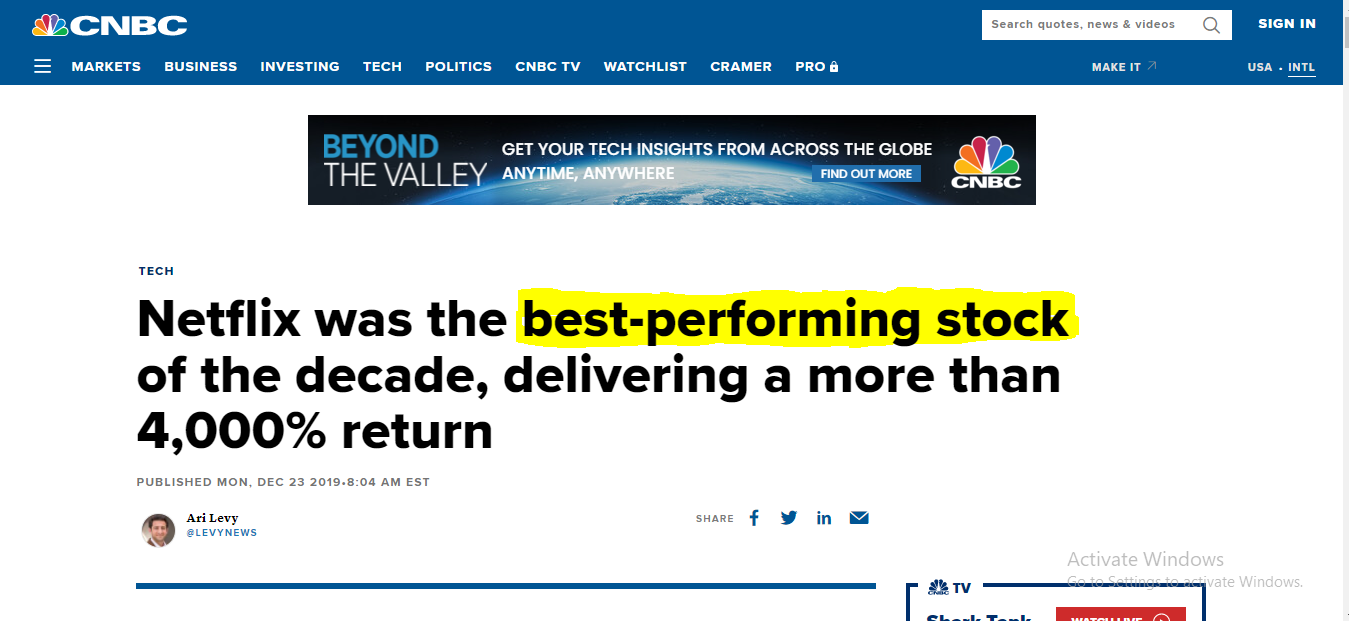

#### https://www.cnbc.com/2019/12/23/netflix-was-the-top-stock-of-the-decade-delivering-over-4000percent-return.html

### ....to be continued

## Future Work

#### I have consider the stocks one year before Covid.Further i will evaluate all the stocks after from 2018 to 2022, and will try to compare with before and after Pandemic.And will try to predict the stocks Price using ML models for future.